In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pricing_functions import data_treatment, request, product_pricing
from ys_functions import *

In [166]:
product_database = {}
weeks = 36
all_df = pd.DataFrame([])
all_jsons = []

for week in range(weeks):
    json = request()
    json = data_treatment(request())
    json, product_database = product_pricing(json, product_database)
    all_jsons.append(json)

#### Dataframe - Quantity of products

In [167]:
all_qnt= df_to_analysis(all_jsons=all_jsons, column_name='qnt')
all_qnt.head(10)

,date,week,month,id,prod_5,prod_8,prod_9,prod_10,prod_15,prod_2,prod_3,prod_6,prod_11,prod_0,prod_1,prod_4,prod_7,balance
0,2042-06-05,Week 1,June,lamz79btg9o4quz6qc,17.0,528.0,234.677373,785.547096,6731.499952,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,9932.757901
1,2042-06-04,Week 1,June,lamz79btg04qfhpcrre,0.0,0.0,0.000000,0.000000,7034.578256,37.0,44.0,29.0,51.783721,0.0,0.0,0.0,0.0,9932.757901
2,2042-06-04,Week 1,June,lamz79bt9t9enk3p6p,0.0,1.0,612.400123,0.000000,7223.764954,0.0,12.0,0.0,0.000000,34.0,17.0,45.0,0.0,9932.757901
3,2042-06-05,Week 1,June,lamz79bt736wqm5es47,36.0,0.0,358.710620,0.000000,6681.781870,40.0,18.0,0.0,0.000000,0.0,4.0,0.0,0.0,9932.757901
4,2042-06-05,Week 1,June,lamz79bt9vzv4x0kgj,36.0,64.0,0.000000,0.000000,6618.208859,40.0,0.0,0.0,205.425873,0.0,0.0,45.0,0.0,9932.757901
5,2042-06-05,Week 1,June,lamz79btvc73cyj8azq,9.0,755.0,204.090599,209.180717,6861.779069,0.0,26.0,0.0,0.000000,0.0,0.0,34.0,0.0,9932.757901
6,2042-06-04,Week 1,June,lamz79btxtrshx4ytke,0.0,25.0,24.156979,662.559738,6603.474598,4.0,0.0,0.0,349.401589,0.0,0.0,28.0,40.0,9932.757901
7,2042-06-05,Week 1,June,lamz79bt4i012nl0ptq,0.0,0.0,32.567650,0.000000,7200.395006,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,9932.757901
8,2042-06-05,Week 1,June,lamz79bulru7xvyw1v8,0.0,825.0,617.979698,552.712330,7227.228786,0.0,8.0,0.0,0.000000,0.0,28.0,35.0,42.0,9932.757901
9,2042-06-04,Week 1,June,lamz79bu2zkqsz1dz5g,0.0,41.0,275.623082,0.000000,6630.802822,36.0,0.0,0.0,0.000000,34.0,25.0,0.0,24.0,9932.757901


In [168]:
sum_all_prods = {f'{x}':'sum' for x in all_qnt.columns[4:]}

#### Grouping - Quantity - Week

In [169]:
weekly_qnt= all_qnt.groupby('week', sort=False).agg(sum_all_prods)
weekly_qnt.head()

,prod_5,prod_8,prod_9,prod_10,prod_15,prod_2,prod_3,prod_6,prod_11,prod_0,prod_1,prod_4,prod_7,balance
week,,,,,,,,,,,,,,
Week 1,237.0,3108.0,4416.499146,5749.156427,124825.271170,226.0,288.0,98.0,2929.342277,160.0,116.0,348.0,109.0,178789.642221
Week 2,35.0,199.0,695.611918,419.622477,21548.350964,30.0,58.0,68.0,713.046055,36.0,51.0,31.0,25.0,29798.273703
Week 3,249.0,2373.0,2629.014746,1884.140584,100370.717783,206.0,144.0,188.0,3514.142591,179.0,239.0,9.0,169.0,139058.610616
Week 4,194.0,2577.0,3298.568632,2609.433025,117746.731572,190.0,154.0,257.0,1372.119629,132.0,208.0,188.0,257.0,158924.126418
Week 5,343.0,4801.0,6686.294973,3070.379236,176256.530648,276.0,303.0,324.0,4686.946420,205.0,331.0,206.0,275.0,228453.431726


#### Grouping - Quantity - Month

In [170]:
monthly_qnt= all_qnt.groupby('month', sort=False).agg(sum_all_prods)
monthly_qnt.head()

,prod_5,prod_8,prod_9,prod_10,prod_15,prod_2,prod_3,prod_6,prod_11,prod_0,prod_1,prod_4,prod_7,balance
month,,,,,,,,,,,,,,
June,550.0,9396.0,10899.325566,14817.139470,381267.387756,781.0,682.0,696.0,9661.308228,673.0,438.0,628.0,486.0,5.165034e+05
July,1263.0,24583.0,24177.927546,19058.359279,883145.383358,1144.0,1077.0,1447.0,21476.343884,1163.0,1598.0,947.0,1588.0,1.122402e+06
August,795.0,15975.0,16334.411062,11721.280833,576335.191317,761.0,805.0,799.0,17371.345731,890.0,974.0,807.0,1087.0,6.952931e+05
September,1174.0,18973.0,14595.352858,18003.852996,613545.031459,853.0,802.0,1350.0,18030.577634,1164.0,784.0,837.0,969.0,7.648224e+05
October,827.0,9639.0,8559.976266,10897.956011,388239.222886,686.0,629.0,648.0,10386.858850,771.0,702.0,617.0,672.0,5.065707e+05


In [171]:
monthly_qnt.to_csv('monthly_revenue.csv')

#### DataFrame - Product Price

In [172]:
all_prices= df_to_analysis(all_jsons=all_jsons, column_name='price')
all_prices.head()

,date,week,month,id,prod_5,prod_8,prod_9,prod_10,prod_15,prod_2,prod_3,prod_6,prod_11,prod_0,prod_1,prod_4,prod_7,balance
0,2042-06-05,Week 1,June,lamz79btg9o4quz6qc,5.56,11.23,88.51,64.5,30.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2.492605e+08
1,2042-06-04,Week 1,June,lamz79btg04qfhpcrre,0.00,0.00,0.00,0.0,30.46,85.32,84.49,41.93,75.22,0.00,0.00,0.00,0.0,2.492605e+08
2,2042-06-04,Week 1,June,lamz79bt9t9enk3p6p,0.00,11.23,88.51,0.0,30.46,0.00,84.49,0.00,0.00,4.44,66.02,3.69,0.0,2.492605e+08
3,2042-06-05,Week 1,June,lamz79bt736wqm5es47,5.56,0.00,88.51,0.0,30.46,85.32,84.49,0.00,0.00,0.00,66.02,0.00,0.0,2.492605e+08
4,2042-06-05,Week 1,June,lamz79bt9vzv4x0kgj,5.56,11.23,0.00,0.0,30.46,85.32,0.00,0.00,75.22,0.00,0.00,3.69,0.0,2.492605e+08


In [173]:
all_prices.to_csv('all_prices.csv')

#### Grouping - Price - Week

In [174]:
weekly_price= all_prices.groupby('week', sort=False).agg(sum_all_prods)
weekly_price.head()

,prod_5,prod_8,prod_9,prod_10,prod_15,prod_2,prod_3,prod_6,prod_11,prod_0,prod_1,prod_4,prod_7,balance
week,,,,,,,,,,,,,,
Week 1,50.040,134.7600,1327.65000,709.500,548.2800,597.240,1013.880000,167.72000,526.5400,22.200000,396.120000,40.590000,164.240,4.486689e+09
Week 2,5.560,11.2300,265.53000,129.000,91.3800,85.320,168.980000,83.86000,75.2200,4.440000,132.040000,3.690000,41.060,7.477815e+08
Week 3,75.060,151.6050,1327.65000,580.500,639.6600,895.860,887.145000,440.26500,1015.4700,59.940000,693.210000,11.070000,431.130,3.489647e+09
Week 4,75.060,303.2100,2588.91750,1015.875,1096.5600,1343.790,1901.024996,943.42500,846.2250,49.950000,1336.905000,65.122054,646.695,3.988168e+09
Week 5,243.945,682.2225,5675.70375,1741.500,2364.4575,3743.415,3421.843721,1556.65125,2284.8075,164.834999,2896.627499,134.314237,1662.930,5.732992e+09


#### Grouping - Price - Month

In [175]:
monthly_price=all_prices.groupby('month').agg(sum_all_prods)
monthly_price.head()

,prod_5,prod_8,prod_9,prod_10,prod_15,prod_2,prod_3,prod_6,prod_11,prod_0,prod_1,prod_4,prod_7,balance
month,,,,,,,,,,,,,,
April,4.158363e+05,1.484370e+06,1.037473e+07,7.696352e+05,5.469515e+06,8.511326e+06,1.728132e+06,4.705695e+06,9.379718e+06,4.650704e+05,1.087869e+06,3.608829e+05,8.865604e+05,7.228555e+09
August,3.783399e+07,1.162825e+08,8.485990e+08,8.172074e+07,4.088545e+08,5.644294e+08,1.402394e+08,2.452257e+08,5.841562e+08,3.064966e+07,8.653226e+07,2.393208e+07,7.444543e+07,1.744824e+10
December,1.929717e+04,5.718927e+04,4.392572e+05,2.866259e+05,1.926636e+05,2.684464e+05,2.274481e+05,1.536875e+05,2.488677e+05,1.339371e+04,2.484097e+05,1.373019e+04,1.438394e+05,7.976336e+09
February,4.930247e+04,1.327738e+05,1.264479e+06,3.812961e+05,5.702101e+05,6.304686e+05,4.161888e+05,3.098400e+05,5.928908e+05,5.030744e+04,7.805584e+05,3.742797e+04,3.640933e+05,4.486689e+09
January,1.046917e+05,3.007900e+05,2.338399e+06,1.148596e+06,1.044829e+06,1.220463e+06,1.529108e+06,6.365109e+05,1.180292e+06,7.323337e+04,1.035927e+06,6.072969e+04,6.802403e+05,1.645119e+10


#### Consolidate (Price x Quantity)

#### Consolidate - Week

In [176]:
df_consolidate_week = pd.DataFrame([])
df_consolidate_week = consolidate(weekly_qnt, weekly_price, df_consolidate_week)
df_consolidate_week.head()

,prod_5,prod_8,prod_9,prod_10,prod_15,prod_2,prod_3,prod_6,prod_11,prod_0,prod_1,prod_4,prod_7,balance
week,,,,,,,,,,,,,,
Week 1,11859.480,4.188341e+05,5.863565e+06,4.079026e+06,6.843920e+07,1.349762e+05,2.919974e+05,16436.560000,1.542416e+06,3552.000000,45949.920000,14125.320000,17902.160000,8.021736e+14
Week 2,194.600,2.234770e+03,1.847058e+05,5.413130e+04,1.969088e+06,2.559600e+03,9.800840e+03,5702.480000,5.363532e+04,159.840000,6734.040000,114.390000,1026.500000,2.228260e+13
Week 3,18689.940,3.597587e+05,3.490411e+06,1.093744e+06,6.420313e+07,1.845472e+05,1.277489e+05,82769.820000,3.568506e+06,10729.260000,165677.189997,99.630000,72860.969998,4.852655e+14
Week 4,14561.640,7.813722e+05,8.539722e+06,2.650858e+06,1.291164e+08,2.553201e+05,2.927578e+05,242460.224999,1.161122e+06,6593.399972,278076.239996,12242.946231,166200.614986,6.338161e+14
Week 5,83673.135,3.275350e+06,3.794943e+07,5.347065e+06,4.167511e+08,1.033183e+06,1.036819e+06,504355.004992,1.070877e+07,33791.174859,958783.702326,27668.732870,457305.749961,1.309722e+15


#### Consolidate - Month

In [177]:
df_consolidate_month = pd.DataFrame([])
df_consolidate_month= consolidate(monthly_qnt, monthly_price, df_consolidate_month)
df_consolidate_month.head()

,prod_5,prod_8,prod_9,prod_10,prod_15,prod_2,prod_3,prod_6,prod_11,prod_0,prod_1,prod_4,prod_7,balance
month,,,,,,,,,,,,,,
April,1.530278e+08,8.346611e+09,6.020443e+10,2.951641e+09,1.192290e+12,3.047055e+09,5.184397e+08,1.995215e+09,6.352072e+10,2.204434e+08,2.959004e+08,1.400226e+08,3.262542e+08,2.082185e+15
August,3.007802e+10,1.857613e+12,1.386137e+13,9.578718e+11,2.356372e+14,4.295308e+11,1.128927e+11,1.959353e+11,1.014758e+13,2.727819e+10,8.428242e+10,1.931319e+10,8.092219e+10,1.213164e+16
December,8.066218e+06,3.589770e+08,3.944813e+09,2.858543e+09,4.512180e+10,1.288543e+08,6.846187e+07,6.731511e+07,1.568814e+09,6.013778e+06,1.172494e+08,6.617952e+06,6.372084e+07,2.535265e+15
February,6.162809e+06,3.660574e+08,7.145637e+09,7.751625e+08,8.296719e+10,1.242023e+08,2.746846e+07,6.165817e+07,1.428091e+09,1.755730e+07,2.622676e+08,8.496149e+06,9.466427e+07,8.021736e+14
January,8.448618e+07,4.365366e+09,4.078230e+10,1.294665e+10,5.418737e+11,9.666065e+08,1.377727e+09,4.831118e+08,1.405025e+10,5.748820e+07,6.609213e+08,4.560800e+07,4.197083e+08,1.078478e+16


In [178]:
df_consolidate_month.to_csv('df_consolidate_month.csv')

#### Consolidate to Dashboard

In [179]:
final_consolidate = df_consolidate_month.T
final_consolidate['balance'] = balance_product(final_consolidate)
final_consolidate.drop('balance', inplace=True)
final_consolidate = final_consolidate.reset_index()
final_consolidate.rename(columns={'index':'product'}, inplace=True)
final_consolidate.to_csv('final_consolidate.csv')

In [180]:
final_consolidate.head()

month,product,April,August,December,February,January,July,June,March,May,November,October,September,balance
0,prod_5,1.530278e+08,3.007802e+10,8.066218e+06,6.162809e+06,8.448618e+07,1.306200e+10,1.621012e+09,1.519189e+08,4.530017e+08,6.728962e+06,4.462190e+10,6.897331e+10,1.592196e+11
1,prod_8,8.346611e+09,1.857613e+12,3.589770e+08,3.660574e+08,4.365366e+09,1.070515e+12,8.659533e+10,5.618610e+09,2.201718e+10,2.794731e+08,1.786418e+12,2.528045e+12,7.370538e+12
2,prod_9,6.020443e+10,1.386137e+13,3.944813e+09,7.145637e+09,4.078230e+10,8.450300e+12,7.064511e+11,6.122387e+10,2.112860e+11,3.186677e+09,1.103274e+13,1.783565e+13,5.227428e+13
3,prod_10,2.951641e+09,9.578718e+11,2.858543e+09,7.751625e+08,1.294665e+10,6.842858e+11,1.787058e+11,6.996667e+09,1.899620e+10,1.762420e+09,1.554990e+12,2.682781e+12,6.105922e+12
4,prod_15,1.192290e+12,2.356372e+14,4.512180e+10,8.296719e+10,5.418737e+11,1.360278e+14,1.231683e+13,9.101260e+11,3.505337e+12,4.024238e+10,2.296067e+14,3.225312e+14,9.424376e+14


#### Dict of DataFrames

In [181]:
dict_dfs = {'week':{'price':weekly_price,'qnt':weekly_qnt, 'consolidate':df_consolidate_week}, \
    'month':{'price':monthly_price,'qnt':monthly_qnt, 'consolidate':df_consolidate_month}}

#### Analysis

##### Monthly Quantities

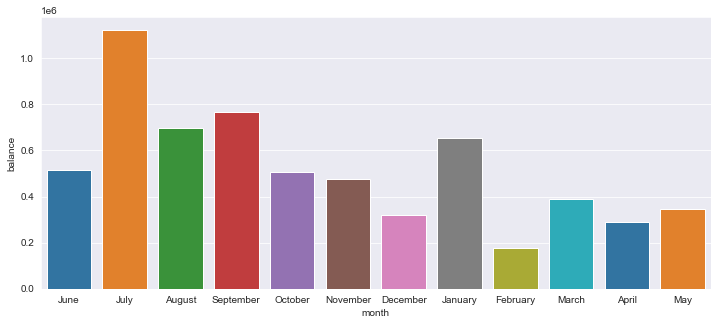

In [182]:
print_barplot(x=monthly_qnt.index, y=monthly_qnt['balance'])

In [183]:
week_per_month = all_qnt.groupby(['month', 'week']).agg({'balance':'sum'})
week_per_month.head()

balance
month  week                  
April  Week 23  148991.368517
       Week 24  139058.610616
August Week 32  248318.947529
       Week 33  297982.737035
       Week 6    79462.063209

#### Quantity of requests on the months with maximum and minimum balance

In [184]:
min_month = monthly_qnt['balance'].min()
min_month = monthly_qnt[monthly_qnt['balance']==min_month].index[0]
max_month = monthly_qnt['balance'].max()
max_month = monthly_qnt[monthly_qnt['balance']==max_month].index[0]

In [185]:
min_weeks = len(week_per_month.loc[min_month,'balance'])
max_weeks = len(week_per_month.loc[max_month,'balance'])

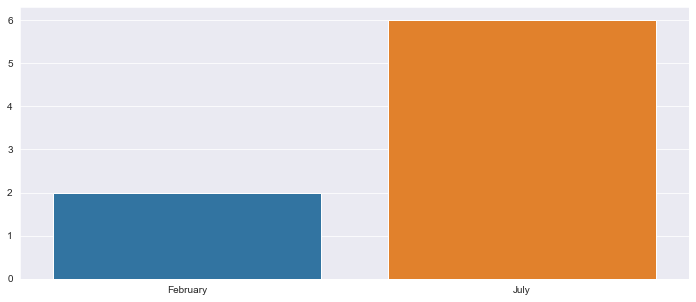

In [186]:
print_barplot(x=[min_month, max_month], y=[min_weeks,max_weeks])

##### Monthly Quantities per Request

In [187]:
def join_all_ratios(all_prices:pd.DataFrame, monthly_price:dict, dict_dfs:dict, period:str, variable: str, report:bool):
    all_ratios = []
    for unity in dict_dfs[period][variable].index:
        ratio = calc_ratio(all_prices=all_prices, dict_dfs=dict_dfs,period=period,variable=variable, unity_of_period=unity)
        all_ratios.append(ratio)
    if report:
        return all_ratios
    else:
        fig, ax = plt.subplots(figsize=(12, 5))
        sns.lineplot(x=monthly_price.index, y=all_ratios)
        sns.set_style('darkgrid')

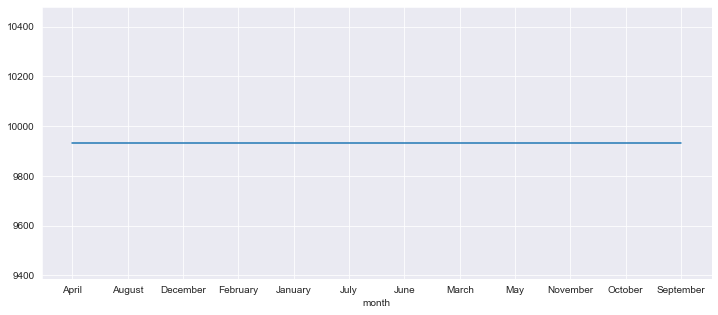

In [188]:
qnt_ratios = join_all_ratios(all_prices=all_prices, monthly_price=monthly_price,dict_dfs=dict_dfs, period='month', variable='qnt', report=True)
join_all_ratios(all_prices=all_prices, monthly_price=monthly_price, dict_dfs=dict_dfs, period='month', variable='qnt', report=False)

In [189]:
price_ratios = join_all_ratios(dict_dfs=dict_dfs,period='month', variable='price', report=True)

TypeError: join_all_ratios() missing 2 required positional arguments: 'all_prices' and 'monthly_price'

#### Consolidate (Price x Quantity) per Resquest

852862359544.9535


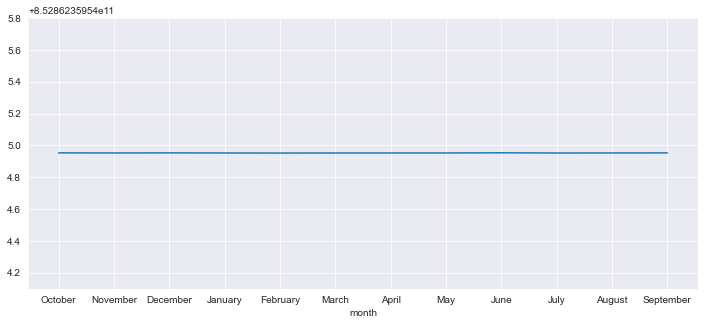

In [ ]:
consolidate_per_transaction(dict_dfs=dict_dfs, period='month', qnt=qnt_ratios, price=price_ratios)

#### Semanas - Quantidade

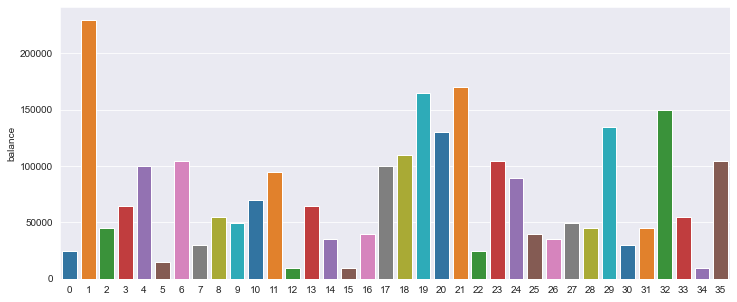

In [ ]:
print_barplot(x=[x for x in range(len(weekly_qnt.index))], y=weekly_qnt['balance'])

#### Semanas - Montante 

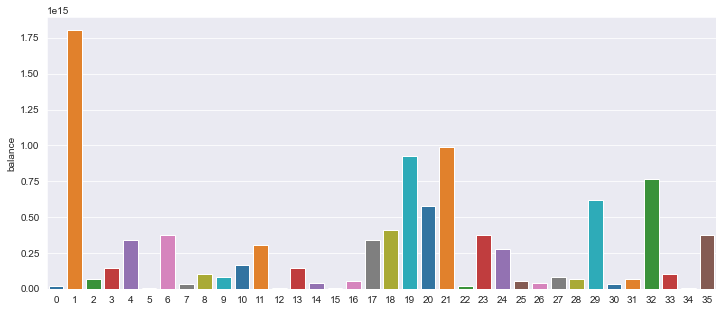

In [ ]:
print_barplot(x=[x for x in range(len(df_consolidate_week.index))], y=df_consolidate_week['balance'])

##### Qual categoria de produtos foi mais vendido?

In [ ]:
monthly_qnt_to_compare = monthly_qnt.T
monthly_qnt_to_compare=monthly_qnt_to_compare.drop('balance')
prods_type=['unity' if (str(monthly_qnt_to_compare.loc[prod, monthly_qnt_to_compare.columns[0]]).split('.')[1]=='0') else 'kg' \
    for prod in monthly_qnt_to_compare.index]

,October,November,December,January,February,March,April,May,June,July,August,September,balance
type,,,,,,,,,,,,,
kg,313246.873563,329567.710992,490291.892392,163672.69805,224927.983285,99946.875155,92751.291285,51006.799229,430162.622499,331356.522878,126979.199868,130856.233057,2.784767e+06
unity,19278.000000,17799.000000,31762.000000,10863.00000,12232.000000,5121.000000,4338.000000,2764.000000,23319.000000,24683.000000,7010.000000,8683.000000,1.678520e+05


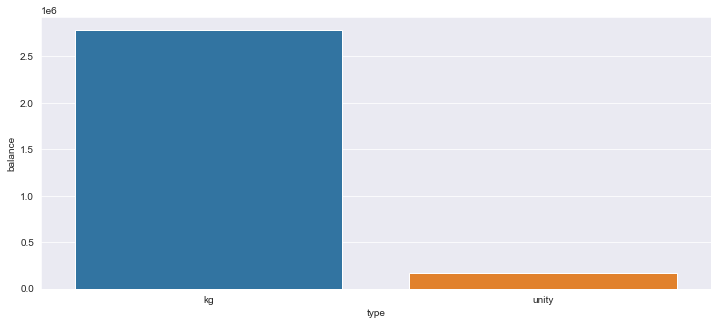

In [ ]:
barplot_type(df=monthly_qnt)

#### Qual categoria de produto obteve maior valor em vendas?

,April,August,December,February,January,July,June,March,May,November,October,September,balance
type,,,,,,,,,,,,,
kg,226535.159762,5.990427e+06,3.569692e+08,6.546464e+08,1.869284e+08,6.150672e+06,2.844436e+06,50807.800942,147292.109385,1.042328e+08,1.743433e+07,1.117111e+07,1.346792e+09
unity,358759.739309,2.015407e+07,1.371748e+09,2.718382e+09,7.064498e+08,2.268004e+07,1.091380e+07,186053.096279,484372.716353,3.874344e+08,6.744390e+07,4.057778e+07,5.346813e+09


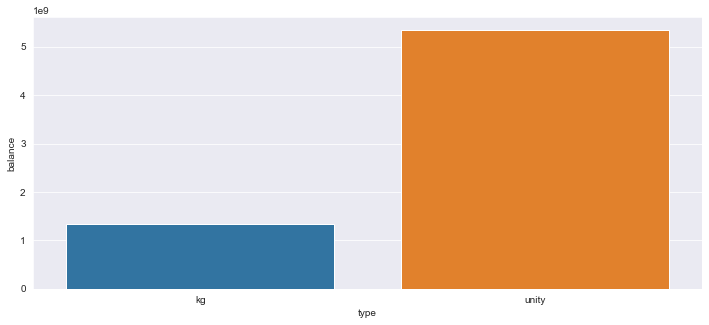

In [ ]:
barplot_type(df=monthly_price)

,April,August,December,February,January,July,June,March,May,November,October,September,balance
type,,,,,,,,,,,,,
kg,4.730489e+09,3.539984e+11,7.955366e+13,7.003340e+13,1.500516e+13,8.706998e+11,5.502266e+11,1.908496e+09,3.195224e+09,1.586230e+13,2.635344e+12,6.553476e+11,1.855300e+14
unity,4.930930e+08,4.411337e+10,1.825546e+13,1.124235e+13,2.734851e+12,2.317741e+11,9.303383e+10,2.778989e+08,5.419354e+08,2.510007e+12,4.270228e+11,1.518335e+11,3.569175e+13


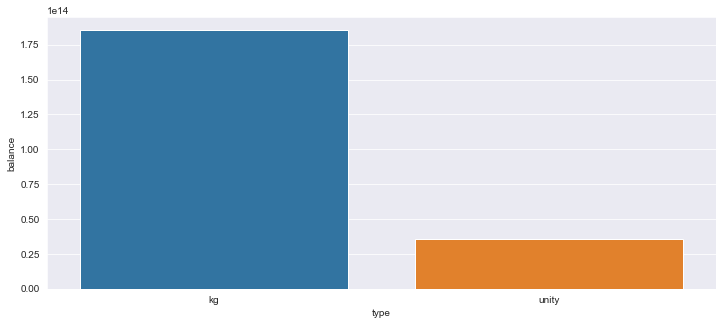

In [ ]:
barplot_type(df_consolidate_month)